In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [2]:
df=pd.read_csv("/content/DengueAndClimateBangladesh.csv")

In [3]:
print(f"First 5 rows: {df.head()}")
print("<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>")
print(f"Info of Dataset: {df.info()}")
print("<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>")
print(f"Data Describe: {df.describe()}")
print("<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>")
print(f"Corelation of Dataset: {df.corr()}")

First 5 rows:    YEAR  MONTH        MIN        MAX   HUMIDITY  RAINFALL  DENGUE
0  2008      1  12.993929  25.059539  78.824885  1.286636       0
1  2008      2  13.658286  26.383448  72.602956  0.687685       0
2  2008      3  20.411250  31.367558  76.903226  0.974194       0
3  2008      4  22.771889  34.031619  73.943810  0.980952       0
4  2008      5  23.945625  34.171060  77.360369  7.021198       0
<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YEAR      134 non-null    int64  
 1   MONTH     134 non-null    int64  
 2   MIN       134 non-null    float64
 3   MAX       134 non-null    float64
 4   HUMIDITY  134 non-null    float64
 5   RAINFALL  134 non-null    float64
 6   DENGUE    134 non-null    int64  
dtypes: float64(4), int64(3)
memory usage:

In [4]:
df.isnull().sum()

YEAR        0
MONTH       0
MIN         0
MAX         0
HUMIDITY    0
RAINFALL    0
DENGUE      0
dtype: int64

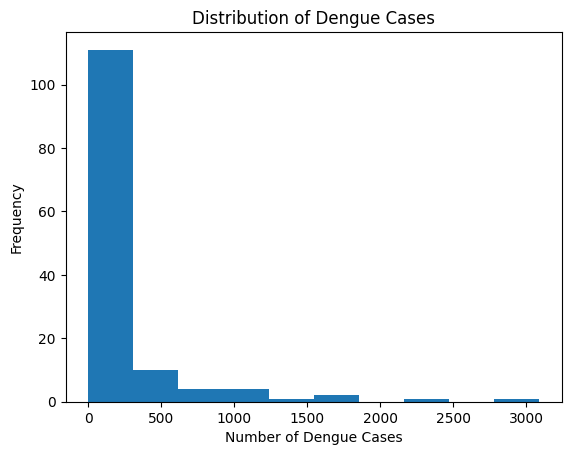

In [5]:
# Histogram of the DENGUE variable
plt.hist(df['DENGUE'], bins=10)
plt.xlabel('Number of Dengue Cases')
plt.ylabel('Frequency')
plt.title('Distribution of Dengue Cases')
plt.show()

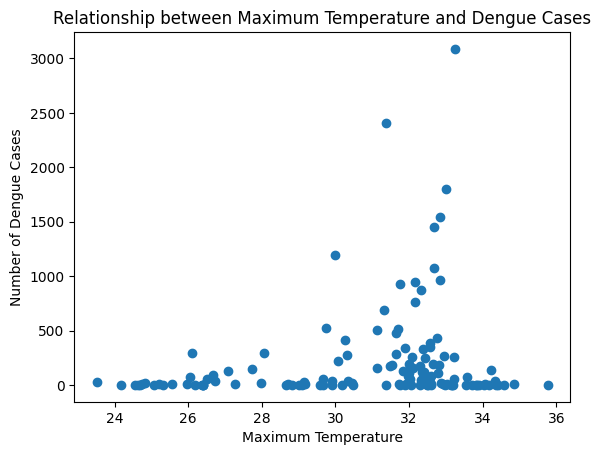

In [6]:
plt.scatter(df['MAX'], df['DENGUE'])
plt.xlabel('Maximum Temperature')
plt.ylabel('Number of Dengue Cases')
plt.title('Relationship between Maximum Temperature and Dengue Cases')
plt.show()

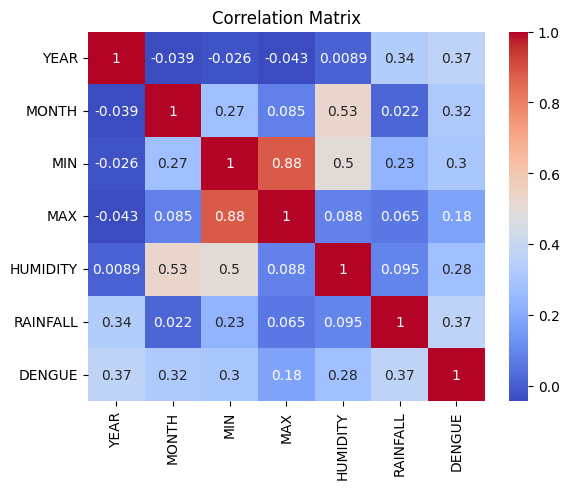

In [7]:
# Correlation matrix heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

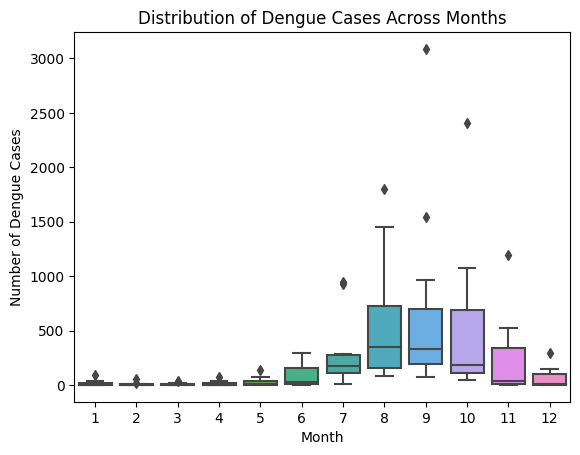

In [8]:
sns.boxplot(x='MONTH', y='DENGUE', data=df)
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.title('Distribution of Dengue Cases Across Months')
plt.show()


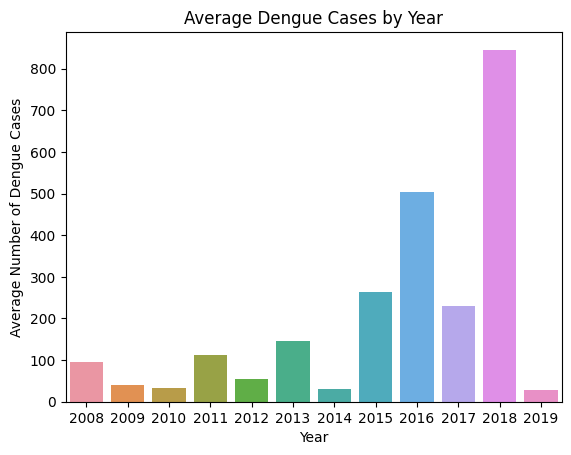

In [9]:
df_yearly = df.groupby('YEAR')['DENGUE'].mean().reset_index()
sns.barplot(x='YEAR', y='DENGUE', data=df_yearly)
plt.xlabel('Year')
plt.ylabel('Average Number of Dengue Cases')
plt.title('Average Dengue Cases by Year')
plt.show()


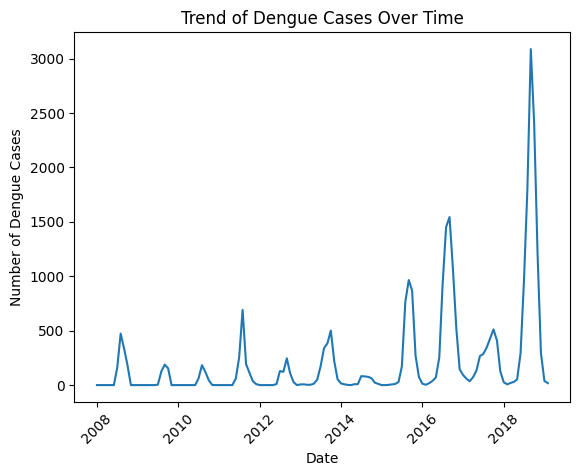

In [10]:
df['DATE'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str), format='%Y-%m')
df_monthly = df.groupby('DATE')['DENGUE'].sum().reset_index()
plt.plot(df_monthly['DATE'], df_monthly['DENGUE'])
plt.xlabel('Date')
plt.ylabel('Number of Dengue Cases')
plt.title('Trend of Dengue Cases Over Time')
plt.xticks(rotation=45)
plt.show()


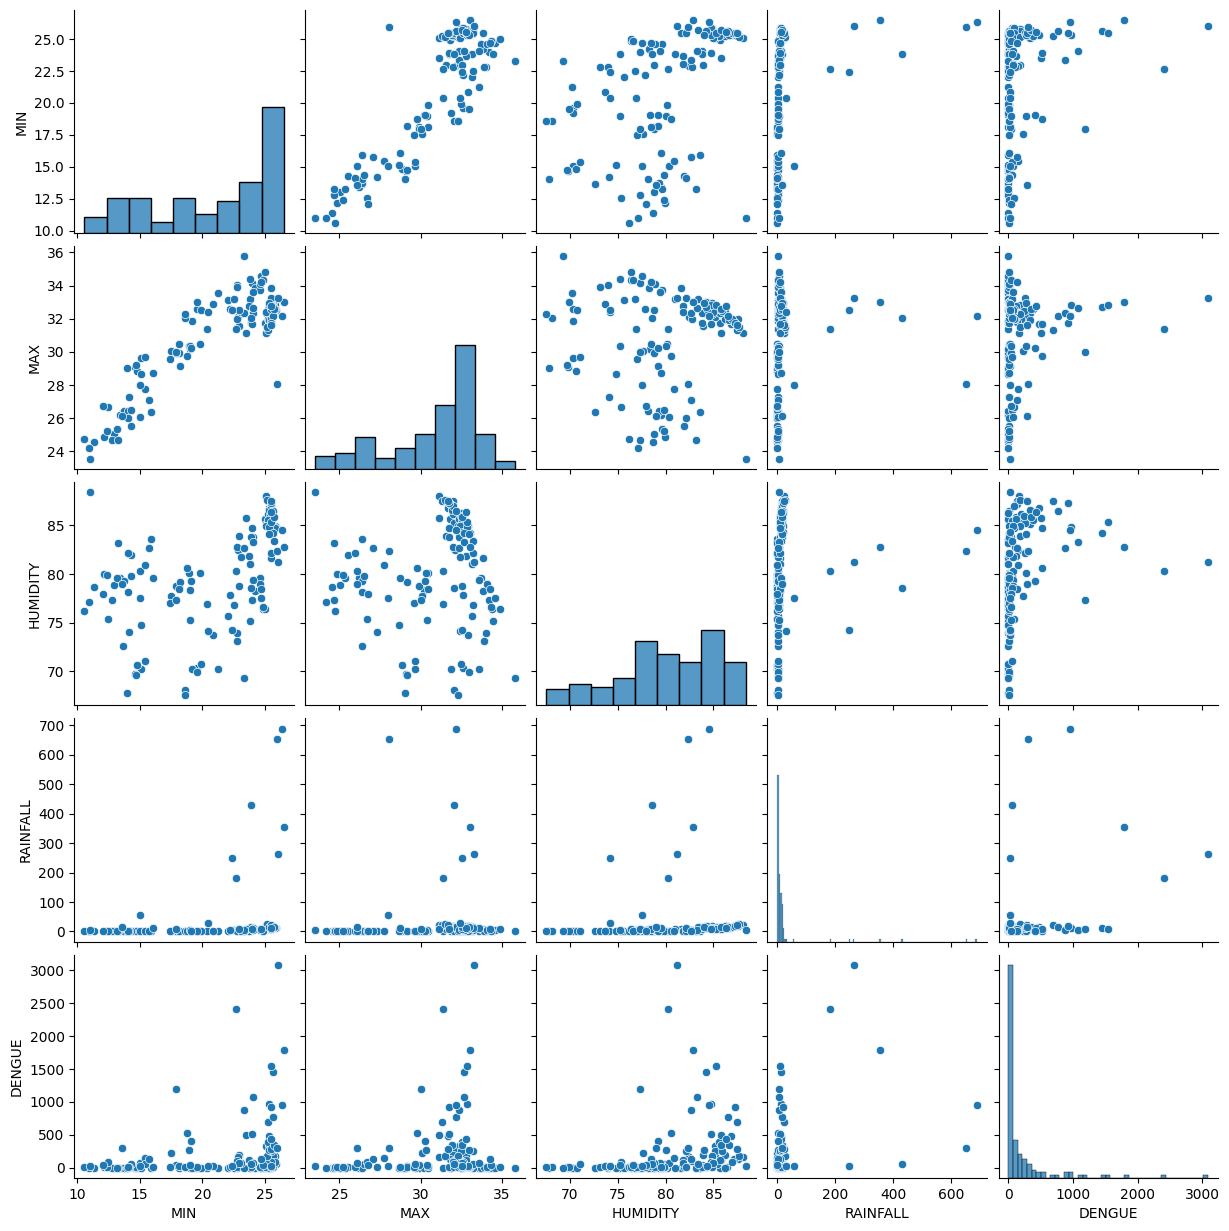

In [11]:
sns.pairplot(df[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL', 'DENGUE']])
plt.show()

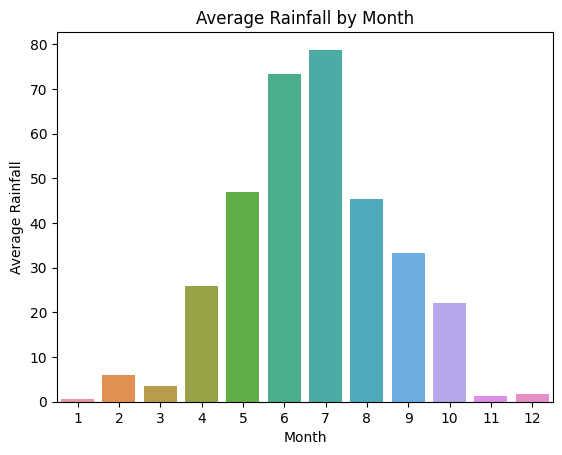

In [12]:
df_monthly_avg_rainfall = df.groupby('MONTH')['RAINFALL'].mean().reset_index()
sns.barplot(x='MONTH', y='RAINFALL', data=df_monthly_avg_rainfall)
plt.xlabel('Month')
plt.ylabel('Average Rainfall')
plt.title('Average Rainfall by Month')
plt.show()

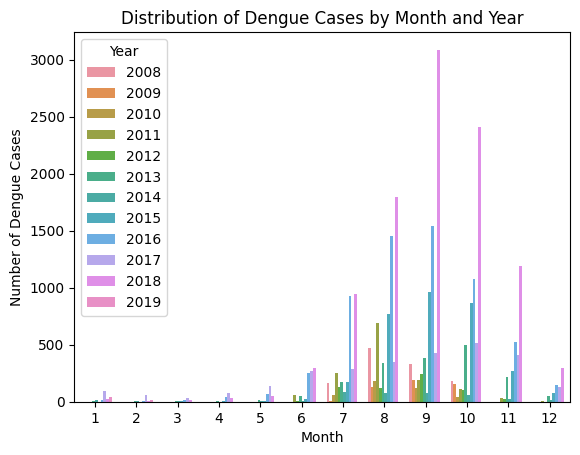

In [13]:
df_monthly_yearly = df.groupby(['YEAR', 'MONTH'])['DENGUE'].sum().reset_index()
sns.barplot(x='MONTH', y='DENGUE', hue='YEAR', data=df_monthly_yearly)
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.title('Distribution of Dengue Cases by Month and Year')
plt.legend(title='Year')
plt.show()


<ipython-input-14-983fbe6538c9>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 10)` for the same effect.

  ax = sns.lineplot(x="YEAR", y="DENGUE",ci=10,color="blue", label="DENGUE",data=df)


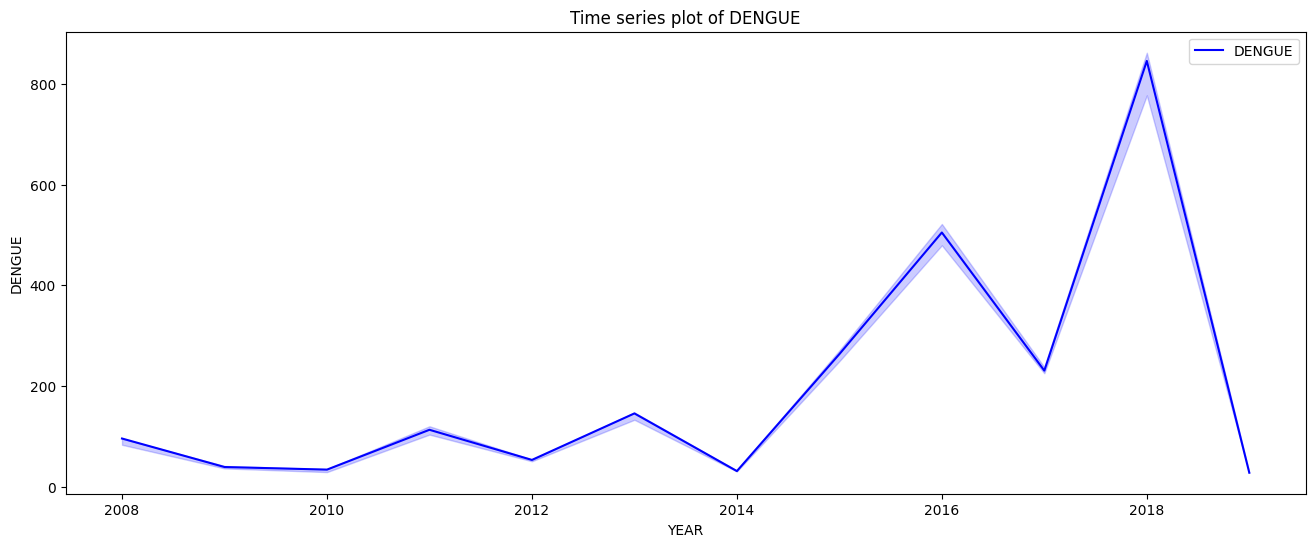

In [14]:
plt.figure(figsize=(16, 6))
plt.title('Time series plot of DENGUE')
ax = sns.lineplot(x="YEAR", y="DENGUE",ci=10,color="blue", label="DENGUE",data=df)

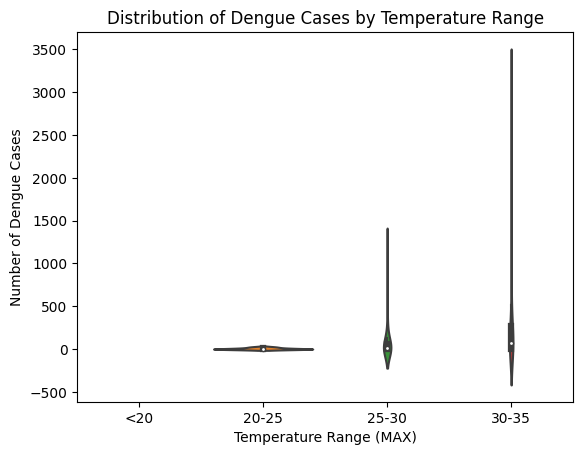

In [15]:
df['TEMP_RANGE'] = pd.cut(df['MAX'], bins=[0, 20, 25, 30, 35], labels=['<20', '20-25', '25-30', '30-35'])
sns.violinplot(x='TEMP_RANGE', y='DENGUE', data=df)
plt.xlabel('Temperature Range (MAX)')
plt.ylabel('Number of Dengue Cases')
plt.title('Distribution of Dengue Cases by Temperature Range')
plt.show()


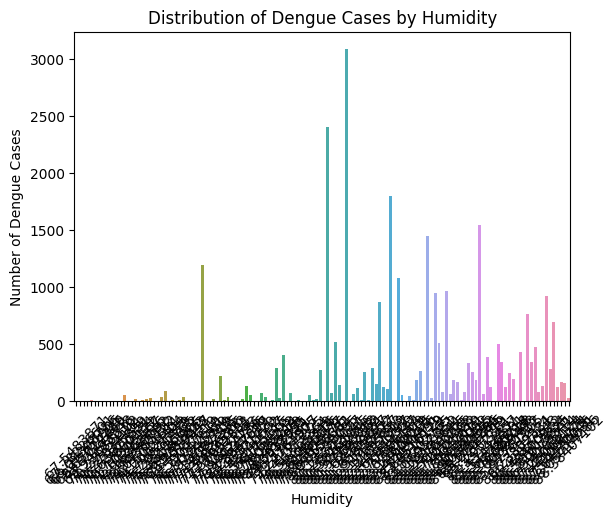

In [16]:
df_humidity = df.groupby('HUMIDITY')['DENGUE'].sum().reset_index()
sns.barplot(x='HUMIDITY', y='DENGUE', data=df_humidity)
plt.xlabel('Humidity')
plt.ylabel('Number of Dengue Cases')
plt.title('Distribution of Dengue Cases by Humidity')
plt.xticks(rotation=45)
plt.show()


<Figure size 2000x1200 with 0 Axes>

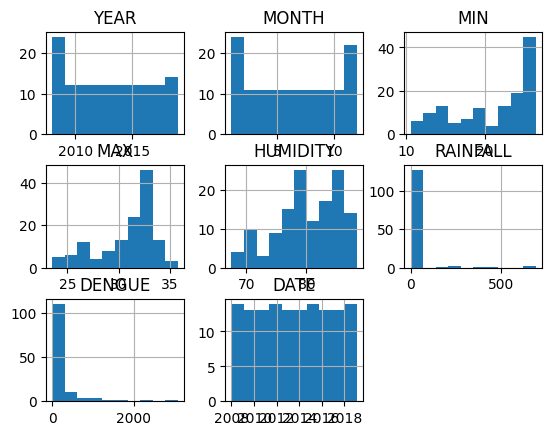

In [17]:
plt.figure(figsize=(20,12),facecolor='red',edgecolor='blue')
df.hist()
plt.show()